## <center> IMPORTAMOS LIBRERIAS Y DATASETS </center>

In [114]:
# IMPORTAMOS LIBRERIAS

# librerias básicas
import numpy as np
import pandas as pd
import wget
import matplotlib.pyplot as plt
import requests
import os
import gzip
import json
import urllib.request  
import urllib
import warnings
import base64
warnings.simplefilter(action='ignore')

# librerias machine learning para regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing


# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# plotear gráficos y visualización
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import plot
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline
sns.set()
import streamlit as st
import plotly.io as pio

# editor de texto
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [115]:
""""
#Creamos la carpeta
if not os.path.isdir('SanFrancisco/'):
    os.mkdir('SanFrancisco/')

#descargamos los archivos comprimidos de esta manera
wget.download('http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/data/listings.csv.gz')
wget.download('http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/data/calendar.csv.gz')
wget.download('http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/data/reviews.csv.gz')

#descargamos los archivos que no estan comprimidos 
url = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/listings.csv' 
urllib.request.urlretrieve(url, 'SanFrancisco/listings1.csv')
url = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/reviews.csv' 
urllib.request.urlretrieve(url, 'SanFrancisco/reviews1.csv')
url = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/neighbourhoods.csv' 
urllib.request.urlretrieve(url, 'SanFrancisco/neighbourhoods.csv')
url = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/neighbourhoods.geojson' 
urllib.request.urlretrieve(url, 'SanFrancisco/neighbourhoods.geojson')
"""

'"\n#Creamos la carpeta\nif not os.path.isdir(\'SanFrancisco/\'):\n    os.mkdir(\'SanFrancisco/\')\n\n#descargamos los archivos comprimidos de esta manera\nwget.download(\'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/data/listings.csv.gz\')\nwget.download(\'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/data/calendar.csv.gz\')\nwget.download(\'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/data/reviews.csv.gz\')\n\n#descargamos los archivos que no estan comprimidos \nurl = \'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/listings.csv\' \nurllib.request.urlretrieve(url, \'SanFrancisco/listings1.csv\')\nurl = \'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/reviews.csv\' \nurllib.request.urlretrieve(url, \'SanFrancisco/reviews1.csv\')\nurl = \'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/neighbourh

In [116]:
# damos un nombre al data frame, lo leemos y a la vez lo descomprimimos con 'gzip', para los demás damos un nombre de variable a cada uno para luego poder usarlos
listings = pd.read_csv('listings.csv.gz', compression = 'gzip')
calendar = pd.read_csv('calendar.csv.gz', compression = 'gzip')
reviews = pd.read_csv('reviews.csv.gz', compression = 'gzip')
listings1 = pd.read_csv(r'C:\Users\rober\Documents\Rober\Bootcamp\Modulo 2\20-Trabajo Módulo 2\SanFrancisco\listings1.csv')
reviews1 = pd.read_csv(r'C:\Users\rober\Documents\Rober\Bootcamp\Modulo 2\20-Trabajo Módulo 2\SanFrancisco\reviews1.csv')
neighbourhoods = pd.read_csv(r'C:\Users\rober\Documents\Rober\Bootcamp\Modulo 2\20-Trabajo Módulo 2\SanFrancisco\neighbourhoods.csv')
geojson =  json.load(open(r'C:\Users\rober\Documents\Rober\Bootcamp\Modulo 2\20-Trabajo Módulo 2\SanFrancisco\neighbourhoods.geojson'))
security = pd.read_csv('crime.csv')

## <center> PREPROCESAMIENTO DE DATOS </center>

In [117]:
# vemos la cabecera del dataframe
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4.81,4.81,4.66,NaN,f,9,4,5,0,0.86
1,958,https://www.airbnb.com/rooms/958,20221204162417,2022-12-04,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.28
2,5858,https://www.airbnb.com/rooms/5858,20221204162417,2022-12-04,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.67
3,8142,https://www.airbnb.com/rooms/8142,20221204162417,2022-12-04,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,12,0,12,0,0.09
4,8339,https://www.airbnb.com/rooms/8339,20221204162417,2022-12-04,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17


In [118]:
# observamos el tipo de dato del dataset
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [119]:
# nombre de columnas, más tarde nos ayudará a seleccionarlas o trabajar con ellas
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [120]:
# ql ser dos dataframes parecidos y con el mismo nombre, vamos a comprar las columnas de cada uno, para ver si se parecen
def columns_compare(df1, df2):
    """columns_compare toma dos dataframes como entradas y compara las columnas de ambos dataframes.
    :param: df1 (DataFrame): Primer DataFrame
    :param: df2(DataFrame): Segundo DataFrame
    :return: Lista con las columnas iguales entre los dos dataframes.
    """
# obtener una lista por cada df con los nombres de cada columna
    columns_df1 = df1.columns.tolist()
    columns_df2 = df2.columns.tolist()
# comparar las dos listas 
    equal_columns = list(set(columns_df1) & set(columns_df2))
    return equal_columns

equal_columns = columns_compare(listings, listings1)
print("Columnas iguales: ",equal_columns)

Columnas iguales:  ['number_of_reviews', 'calculated_host_listings_count', 'latitude', 'license', 'host_name', 'room_type', 'name', 'minimum_nights', 'availability_365', 'number_of_reviews_ltm', 'longitude', 'price', 'last_review', 'reviews_per_month', 'id', 'host_id', 'neighbourhood']


In [121]:
# al ver que tenemos columnas parecidas, comparamos una columna para ver si todos los valores son parecidos, de esta manera podremos elegir si hacer merge en alguna y juntar los dataframes
def value_colums(df1, df2):
    """value_colums toma dos dataframes como entradas y verifica si la columna de ambos dataframes tienen los mismos valores.
    :param: df1 (DataFrame): Primer DataFrame
    :param: df2 (DataFrame): Segundo DataFrame
    :return: True si los valores son iguales, False si no lo son.
    """
    # obtener los valores de la columna 'id' de cada DataFrame
    values_df1 = df1['id'].values
    values_df2 = df2['id'].values
    
    # comparar los valores
    if np.array_equal(values_df1, values_df2):
        return True
    else:
        diferents = np.where(values_df1 != values_df2)[0]
        print("Valores diferentes:", values_df2[diferents])
        return False
    
value_colums(listings, listings1)

Valores diferentes: [               958             487499             144978 ...
 766969861563240321 766974003390473190 768094948092995571]


False

In [122]:
# valores nulos y ordenados de más a menos
listings.isnull().sum().sort_values(ascending = False)

neighbourhood_group_cleansed    6789
bathrooms                       6789
calendar_updated                6789
license                         2697
host_about                      2171
                                ... 
host_listings_count                0
host_verifications                 0
has_availability                   0
availability_30                    0
id                                 0
Length: 75, dtype: int64

In [123]:
# porcentaje de valores nulos, ordenados
percent_missing = listings.isnull().sum() * 100 / len(listings)
percent_missing.sort_values(ascending = False).head()


neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
calendar_updated                100.000000
license                          39.726027
host_about                       31.978200
dtype: float64

In [124]:
# para ver cuantos nulos hay
nulls = listings.isnull().sum()
# gráfico de barras para ver cuantos nulos hay
fig = go.Figure(go.Bar(x=nulls.index, y=nulls))
fig.update_layout(template="plotly_dark",title = 'Total de Nulos por Columna', xaxis_title="Columnas por indice", yaxis_title="Total Nulos")
fig.update_layout(xaxis=dict(title_standoff=10, tickangle=45))
fig.show()

In [125]:
# lista de columnas a eliminar que sobrepasan el 30% de valores nulos
columns_to_drop = ["neighbourhood_group_cleansed", "calendar_updated", "bathrooms", "license", "host_about", "host_neighbourhood", "neighborhood_overview", "neighbourhood"]

In [126]:
# eliminamos las columnas anteriormente seleccionadas
listings.drop(columns_to_drop, axis=1, inplace=True)

In [127]:
# creamos una función para rellenar los valores nulos por la media o la moda según el tipo de dato
def fillna(df, columns):
    """fillna rellena los valores nulos en un DataFrame con la media o moda dependiendo del tipo de columna.
    :param df: DataFrame que contiene los datos.
    :param columns: Lista con los nombres de las columnas que contienen
    :return: Devuelve dataframe con los valores nulos rellenados.
    """
    for column in columns:
        if(df[column].dtype == 'float64' or df[column].dtype == 'int64'):
            number = df[column].mean()
        else:
            number = df[column].mode()[0]
        df[column]= df[column].fillna(number)
    return df

listings = fillna(listings, listings.columns)

In [128]:
# comprobamos si seguimos teniendo nulos
listings.isnull().sum().sum()

0

<AxesSubplot: >

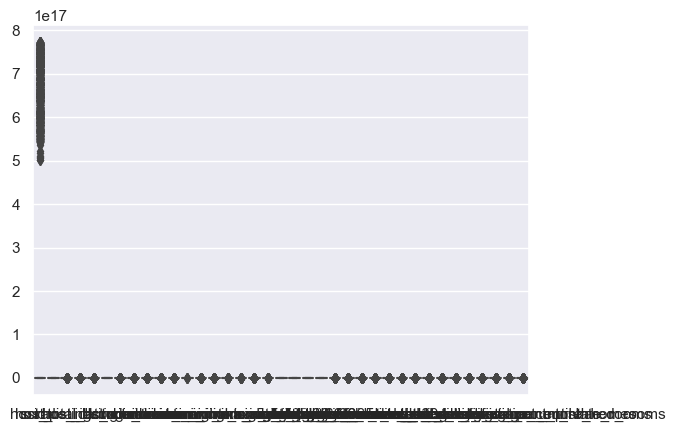

In [129]:
# hacemos un bloxplot total de los outliers
# comprobamos que solo afecta a la columna Id, vamos a ajustarlo aunque probablemente borremos esta columna por que puede dar lugar a confusión
sns.boxplot(data = listings)

In [130]:
# creamos una función para eliminar los outliers
def outliers_repair (df):
    """outliers_repair se usa para identificar y reparar valores atípicos en un DataFrame dado.
    :param listings: DataFrame para el cual se deben reparar los valores atípicos.
    :returns: dataFrame sin valores atípicos.
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

    dataset_wo_outliers = df.copy()
    dataset_wo_outliers = pd.DataFrame(df)
    for col in df.columns:
        if df[col].dtype == 'object':
            mode = df[col].mode()[0]
            dataset_wo_outliers.loc[outliers[col], col] = mode
        else:
            mean = df[col].mean()
            dataset_wo_outliers.loc[outliers[col], col] = mean

    return dataset_wo_outliers

listings = pd.DataFrame(outliers_repair(listings))

<AxesSubplot: >

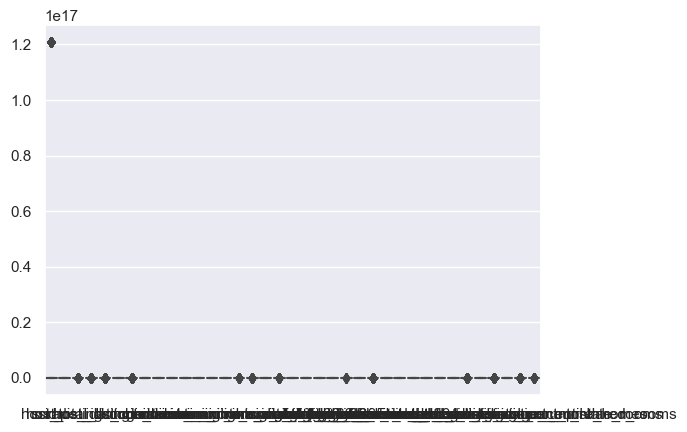

In [131]:
# ploteamos de nuevo los outliers para ver la corrección de nuestra función
sns.boxplot(data = listings)

In [132]:
# vemos que la columna 'price' tiene un simbolo antes del int
listings['price'].head(3)

0     $55.00
1    $194.00
2    $235.00
Name: price, dtype: object

In [133]:
# hacemos una función para eliminar el simbolo del $ de todas las columnas
def remove_sign(df, column):
    """remove_sign se usa para eliminar un simbolo de en este caso un número
    :param listings: dataframe que estamos usando
    :param price: columna que queremos usar
    :return: dataframe con el texto eliminado de la columna
    """
    listings['price'] = listings['price'].apply(lambda x: x.replace("$", ""))
    
    return listings
listings = remove_sign(listings, 'price')


In [134]:
# hacemos una función para eliminar las comas y convertimos el precio a float
def fix_price_column(df):
    """fix_price_column quita las comas de la columa que seleccionemos de nuestro dataframe y cambia los valores a float
    :param df: Dataframe sobre el que vamos a usar esta función
    :return: el valor corregido dentro de la columna asignada
    """
    listings['price'] = listings['price'].str.replace(',','')
    listings['price'] = listings['price'].astype(float)
    return listings
listings = fix_price_column(listings)

In [135]:
# vemos si la función ha tenido efecto
listings['price'].head(3)

0     55.0
1    194.0
2    235.0
Name: price, dtype: float64

In [136]:
# hacemos una función para eliminar una longitud que da problemas a la hora de representar los mapas
def drop_rows(df, column, value):
    """drop rows elimina el valor que queremos de una fila de una columna
    :param df: dataframe que vamos a usar
    :param column: columna que tendrá los valores de las filas que queremos borrar
    :param value: valor que queremos borrar
    :return: devuelve el dataframe 
    """
    df = df[df[column] != value]
    return df

listings = drop_rows(listings, "longitude",  -122.43018616682234)

In [137]:
# creamos una función lambda que nos permita agrupar la distribución en los precios normales
listings['price'] = listings['price'].apply(lambda x: int(x/1000) if x >= 10000 else (int(x/100) if x >= 1000 else x))

In [138]:
# creamos una función para eliminar dentro de la columna precio los outliers
def remove_outliers(df, column):
    """esta función elimina valores outliers dentro de una columna de nuestro def
        :param df: llama al dataframe
        :param column: columna a eliminar los outliers
        :return: retorna el df sin outliers en nla columna seleccionada
    """
    df_clean = df[df[column].notnull()]
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] < mean - 2*std) | (df[column] > mean + 2*std)].index # std*2 es el doble de la desviación estandar que sirve para definir un rango de valores "normales" para una variable
    df.drop(outliers, inplace=True)
    return df
listings = remove_outliers(listings, 'price')

In [139]:
# agrupamos los barrios en sus distritos para una mejor lectura y creamos un nueva columna dentro del dataframe
listings['districts'] = ''
listings.loc[listings['neighbourhood_cleansed'].isin(['Pacific Heights', 'Nob Hill', 'Presidio Heights', 'Russian Hill']), 'districts'] = 'Central/downtown'
listings.loc[listings['neighbourhood_cleansed'].isin(['Western Addition', 'Haight Ashbury', 'Glen Park', 'Downtown/Civic Center', 'Financial District', 'Marina', 'North Beach', 'Chinatown']), 'districts'] = 'Upper Market and beyond (south central)'
listings.loc[listings['neighbourhood_cleansed'].isin(['Bernal Heights', 'Bayview', 'Excelsior', 'Outer Mission', 'Inner Sunset', 'Visitacion Valley', 'Crocker Amazon', 'Ocean View', 'Parkside']), 'districts'] = 'Bernal Heights/Bayview and beyond (southeast)'
listings.loc[listings['neighbourhood_cleansed'].isin(['Mission', 'Castro/Upper Market', 'Potrero Hill', 'South of Market', 'Outer Sunset']), 'districts'] = 'Upper Market and beyond (south central)'
listings.loc[listings['neighbourhood_cleansed'].isin(['Outer Richmond', 'Inner Richmond', 'West of Twin Peaks', 'Noe Valley', 'Twin Peaks', 'Golden Gate Park', 'Presidio', 'Lakeshore', 'Diamond Heights', 'Seacliff']), 'districts'] = 'Richmond'
listings.loc[listings['neighbourhood_cleansed'].isin(['Inner Richmond', 'Inner Sunset', 'Parkside', 'Outer Sunset']), 'districts'] = 'Sunset'

In [140]:
listings['districts'].value_counts()

Upper Market and beyond (south central)          3552
Bernal Heights/Bayview and beyond (southeast)     897
Central/downtown                                  620
Sunset                                            546
Richmond                                          509
Name: districts, dtype: int64

## <center> EDA </center>

In [141]:
# creamos una matriz de coorrelación entre varias variables
corr = listings[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.179539,0.005504,0.033921,-0.117291,-0.041602
minimum_nights,-0.179539,1.000000,-0.359375,-0.362182,0.006568,0.193031
number_of_reviews,0.005504,-0.359375,1.000000,0.392649,-0.218473,-0.094599
reviews_per_month,0.033921,-0.362182,0.392649,1.000000,-0.177003,-0.053559
calculated_host_listings_count,-0.117291,0.006568,-0.218473,-0.177003,1.000000,0.105471
availability_365,-0.041602,0.193031,-0.094599,-0.053559,0.105471,1.000000


In [142]:
#ploteamos dicha matriz de coorrelación
fig = px.imshow(corr, color_continuous_scale=px.colors.sequential.Jet, template="plotly_dark")
fig.show()

In [143]:
# distribución de las habitaciones en San Francisco (guardamos el archivo en html)
lats = listings['latitude'].tolist()
lons = listings['longitude'].tolist()
locations = list(zip(lats, lons))

map = folium.Map(location=[37.7749300, -122.4194200], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map)
map.save("map.html")
map

In [144]:
# hacemos un value counts que agrupe las distribución de cada barrio y lo ploteamos en un gráfico de pastel
value_counts = listings['neighbourhood_cleansed'].value_counts()

fig = go.Figure(data=[go.Pie(labels=value_counts.index, values=value_counts.values, hovertext=value_counts.index)])
fig.update_layout(title_text='Distribución de los barrios dentro de San Francisco')
fig.update_layout(template="plotly_dark")
fig.show()

In [145]:
# viendo la distribución en el gráfico de pastel, lo pasamos a un mapa
map = px.scatter_mapbox(listings, lat='latitude', lon='longitude', color='neighbourhood_cleansed',
                        title='Distribución de los barrios dentro de San Francisco',
                        size_max=15, zoom=10, height=600)
map.update_layout(mapbox_style='open-street-map')
map.update_layout(margin={"r":80,"t":80,"l":80,"b":80})
map.update_layout(template="plotly_dark")
map.show()

In [146]:
# hacemos un value counts que agrupe las distribución de cada distrito y lo ploteamos en un gráfico de pastel
value_counts = listings['districts'].value_counts()

fig = go.Figure(data=[go.Pie(labels=value_counts.index, values=value_counts.values, hovertext=value_counts.index)])
fig.update_layout(title_text='Distribución de los distritos dentro de San Francisco')
fig.update_layout(template="plotly_dark")
fig.show()

In [147]:
# creamos un mapa con la distribución de los distritos
map = px.scatter_mapbox(listings, lat='latitude', lon='longitude', color='districts',
                        title='Distribución de los distritos dentro de San Francisco',
                        size_max=15, zoom=10, height=600)
map.update_layout(mapbox_style='open-street-map')
map.update_layout(margin={"r":80,"t":80,"l":80,"b":80})
map.update_layout(template="plotly_dark")
map.show()

Mapa que utilizaremos en la presentación, utilizamos el csv que viene adjunto
Seguridad en los barrios: [https://www.civichub.us/ca/san-francisco/gov/police-department/crime-data]

In [148]:
# vemos si hay nulos para el preprocesamiento
security.isnull().sum()

incident_date            0
incident_datetime        0
analysis_neighborhood    0
incident_category        0
incident_category.1      0
resolution               0
police_district          0
incident_description     0
incident_number          0
dtype: int64

In [149]:
# comparamos las variables vecindario (x), con la categoria de incidente en un scatter()
fig = go.Figure(data=go.Scatter(x=security['analysis_neighborhood'], y=security['incident_category'],mode='markers'))
fig.update_layout(template="plotly_dark")
fig.show()

In [150]:
# value counts sobre accommodates
listings.value_counts('accommodates')

accommodates
2.000000    2798
4.000000    1333
1.000000     660
3.000000     482
6.000000     372
5.000000     242
3.190602     181
7.000000      54
0.000000       2
dtype: int64

In [151]:
# hacemos un plot del precio por medio de alojamientos haciendo un groupby según distrito y huéspedes
listings_accommodates = listings.groupby(['districts', 'accommodates'])['price'].mean().sort_values(ascending=True).reset_index()

fig = px.bar(listings_accommodates, x='price', y='districts', color='accommodates', orientation='h', 
             title='Precio promedio de alojamientos según distrito y cantidad de huéspedes',
             labels={'price':'Precio medio', 'neighbourhood_cleansed':'Barrio', 'accommodates':'Cantidad de huéspedes'}, template="plotly_dark")
fig.show()

In [152]:
# creamos un grafico del precio promedio de un alojamiento para 2 personas en cada barrio
average = listings[listings['accommodates']==2]
average = average.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)

fig = go.Figure(data=[go.Bar(y=average.index, x=average.values, orientation='h')])
fig.update_layout(title='Precio promedio de un alojamiento para 2 personas en cada barrio', xaxis_title='Precio medio', yaxis_title='Barrio', template="plotly_dark")
fig.show()

In [153]:
# creamos un grafico del precio promedio de un alojamiento para 2 personas en cada barrio
average1 = listings[listings['accommodates']==2]
average1 = average1.groupby('districts')['price'].mean().sort_values(ascending=True)

fig = go.Figure(data=[go.Bar(y=average1.index, x=average1.values, orientation='h')])
fig.update_layout(title='Precio promedio de un alojamiento para 2 personas en cada distrito', xaxis_title='Precio medio', yaxis_title='Distrito',template="plotly_dark")
fig.show()

In [154]:
# hacemos un value counts para ver cuantos tipos de habitaciones hay
room_type_counts = listings.room_type.value_counts()

# creamos un diagrama de barras y lo ploteamos
fig = px.bar(room_type_counts, x=room_type_counts.index, y=room_type_counts.values,
             template='plotly_dark',
             color=room_type_counts.index,
             color_continuous_scale='Plasma',
             labels={'x':'', 'y':''})
fig.update_layout(title = 'Tipos de habitaciones', xaxis_title="Tipo de habitación", yaxis_title="Total")
fig.show()

In [155]:
# tras ver el tipo de habitación, lo relacionamos con el precio y la distribución que encontramos en San Francisco
map = px.scatter_mapbox(listings, lat="latitude", lon="longitude",
                        opacity=1.0, 
                        color =  'price', 
                        title = ('Distribución por precio y tipo de habitación en San Francisco'),
                        color_continuous_scale=px.colors.sequential.Jet, 
                        height = 600, zoom = 9.7,
                        text= 'room_type',
                        hover_name = 'name')

map.update_layout(mapbox_style="open-street-map")
map.update_layout(margin={"r":80,"t":80,"l":80,"b":80})
map.update_layout(template="plotly_dark")
map.show()

In [156]:
# creamos intervalos de precio para agrupar los precios que nos encontramos y que sea más fácil de lectura
listings['price_bin'] = pd.cut(listings["price"], [0,100,200,300,400,float('inf')], 
                              labels=["0-100","100-200","200-300","300-400","400-500"])

# creamos una tabla pivote entre la columna de barrios y el precio
pivot_table = listings.pivot_table(values='id', index='neighbourhood_cleansed', columns='price_bin', aggfunc='count')

# hacemos el grafico de barras primero introduciendo la pivot table
data = []
for i in pivot_table.index:
    data.append(go.Bar(x=pivot_table.columns, y=pivot_table.loc[i], name=i))

# mostramos el gráfico de barras
fig = go.Figure(data=data)
fig.update_layout(template='plotly_dark', title_text='Distribución de precio por barrio', xaxis_title='Precio', yaxis_title='Total de casas', barmode='stack')
fig.show()

In [157]:
# creamos intervalos de precio para agrupar los precios que nos encontramos y que sea más fácil de lectura
listings['price_bin'] = pd.cut(listings["price"], [0,100,200,300,400,float('inf')], 
                              labels=["0-100","100-200","200-300","300-400","400-500"])

# creamos una tabla pivote entre la columna de barrios y el precio
pivot_table2 = listings.pivot_table(values='id', index='districts', columns='price_bin', aggfunc='count')

# hacemos el grafico de barras primero introduciendo la pivot table
data = []
for i in pivot_table2.index:
    data.append(go.Bar(x=pivot_table2.columns, y=pivot_table2.loc[i], name=i))

# mostramos el gráfico de barras
fig = go.Figure(data=data)
fig.update_layout(template='plotly_dark', title_text='Distribución de precio por distrito', xaxis_title='Precio', yaxis_title='Total de casas', barmode='stack')
fig.show()

In [158]:
# hacemos un plot sobre la cantidad de días durante los cuales un host en particular está disponible en un año
map = px.scatter_mapbox(listings, lat='latitude', lon='longitude', color='availability_365',
                        title='Cantidad de días durante los cuales un host en particular está disponible en un año',
                        size_max=15, zoom=10, height=600, color_continuous_scale='viridis')
map.update_layout(mapbox_style='open-street-map')
map.update_layout(template="plotly_dark")
map.show()

## <center> POSIBLES INFRACCIONES </center>

In [159]:
private = listings[listings['room_type'] == "Private room"]
host_private = private.groupby(['host_id', 'host_name']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head(9)

,host_id,host_name,private_rooms
822,267895362.0,Rocky,54
752,173206762.0,Stratford,50
366,17042045.0,The Bartlett,48
810,253575857.0,Dorel SF,36
553,64646820.0,Michelle,33
244,6346492.0,Dana,29
706,131200418.0,Lois,23
526,47514427.0,Jeffrey & Susan & Bryce,23
421,23719876.0,Yumi,22


In [160]:
# creamos una variable para ver que posibles alquileres ilegales encontramos
illegal_rentings = listings.groupby(['host_id', 'host_name', 'maximum_nights']).size().reset_index(name='illegal_rooms')
illegal_rentings = illegal_rentings.sort_values(by=['maximum_nights'], ascending=False)
illegal_rentings = illegal_rentings[illegal_rentings['maximum_nights'] >= 90]
illegal_rentings

,host_id,host_name,maximum_nights,illegal_rooms
859,4124339.0,Tanmay,1195.0,1
1858,22058496.0,Ada,1125.0,1
2266,44754327.0,Sarika,1125.0,1
895,4344170.0,Katherine,1125.0,2
893,4335351.0,Elissa,1125.0,1
...,...,...,...,...
3145,139970475.0,Sharon,90.0,1
1837,21336893.0,Taylor,90.0,1
1933,24850666.0,Sean,90.0,1
2185,39534113.0,Dustin,90.0,1


En San Francisco, California, las rentas de Airbnb están sujetas a ciertas regulaciones. Según la ordenanza de "Alquileres residenciales a corto plazo" de la ciudad, los anfitriones deben registrar sus unidades con la ciudad y pagar un impuesto hotelero del 14%. Además, los anfitriones están limitados a alquilar su residencia principal durante un máximo de 90 días por año calendario, a menos que hayan obtenido un permiso de uso condicional. Las violaciones de estas regulaciones pueden resultar en multas y sanciones.

En línea [https://sfplanning.org/str/faqs-short-term-rentals#:~:text=You%20must%20be%20the%20permanent,unit%20in%20which%20you%20reside.]  
En línea [https://www.lodgify.com/guides/short-term-rental-rules-california/]

Además de las regulaciones en San Francisco, California tiene regulaciones adicionales que afectan a las rentas de Airbnb. Por ejemplo, la ley estatal requiere que todos los anfitriones proporcionen cierta información a los huéspedes, como información de contacto de emergencia y información sobre detectores de humo y extintores.

En línea [https://www.reuters.com/article/us-health-travel-airbnb-safety-idUSKBN1I82JN]

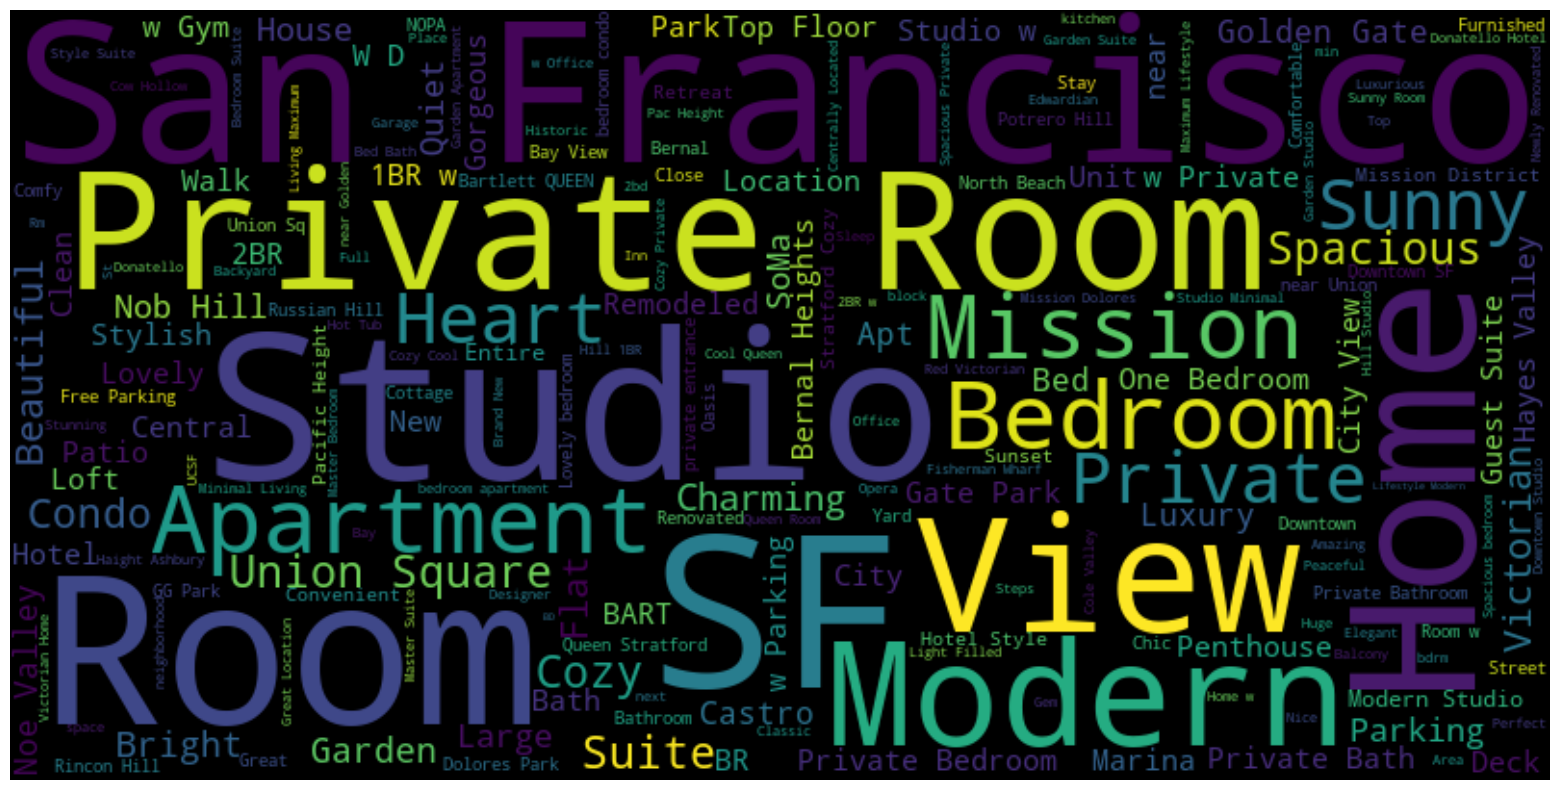

In [161]:
# ploteamos un mapa de palabras
text = ' '.join([text for text in listings['name']])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='black').generate(str(text))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## <center> CONCLUSIONES </center>

- Airbnb es una plataforma popular de alquiler vacacional en San Francisco.
- Según los datos de Inside Airbnb, en 2021 había más de 12,000 listados activos en la ciudad.')
- Pacific Heights es el barrio más caro para los alquileres de Airbnb en San Francisco, conocido por sus casas de lujo y hermosas vistas del Golden Gate Bridge y la Bahía.')
- Otros barrios caros para los alquileres de Airbnb en San Francisco incluyen: Russian Hill, Presidio Heights, Presidio')
- Según los datos de Inside Airbnb, en 2021 el barrio de Bayview es el más económico para los alquileres de Airbnb en San Francisco')
- Alojarse en barrios como Bayview o Excelsior, pueden ofrecer una mejor experiencia para el turista, dado el ambiente local')
- La ciudad tiene una tasa relativamente alta de delitos contra la propiedad, con incidentes de robo y allanamiento de morada siendo especialmente comunes.')
- Las tasas de delitos violentos en San Francisco son relativamente bajas en comparación con otras ciudades importantes.')
- En 2019, San Francisco aprobó una ley que requiere a los anfitriones registrar sus unidades en la ciudad y cumplir con un límite anual de 90 días de alquiler.')
- El salario medio de un data analyst en San Francisco, según Glassdoor es de alrededor de $90,000 al año. Sin embargo, los salarios pueden variar desde alrededor de $65,000 al año hasta más de $130,000 al año.

## <center> REGRESION LINEAL </center>
En línea: [https://medium.com/analytics-vidhya/python-exploratory-data-analysis-eda-on-nyc-airbnb-cbeabd622e30]

Vamos a utilizar este modelo matemático para explicar la relación entre varias variables independientes y varias variables dependientes.
- Variables independientes('id','neighbourhood_cleansed','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365') 
- y una Variable dependiente ('price'). 

**Con esto intentaremos predecir el valor del precio en función de las otras variables independientes**

In [162]:
# buscamos las columnas tipo objeto para codificarlas de variables categoricas a variables númericas
searching_dtype = listings.dtypes == object
list(listings.loc[:,searching_dtype])

['listing_url',
 'last_scraped',
 'source',
 'name',
 'description',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'instant_bookable',
 'districts']

In [163]:
# creamos una variable para codificar estas columnas al ser categoricas
columns_to_encode = ['listing_url', 'last_scraped', 'source', 'name', 'description', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                     'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text',
                     'amenities', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'instant_bookable', 'districts']

# creamos un bucle for que itera por todas las columnas y las codifica
for column in columns_to_encode:
    encode = preprocessing.LabelEncoder()
    encode.fit(listings[column])
    listings[column] = encode.transform(listings[column])
listings.sort_values(by='price',ascending=True,inplace=True)

In [164]:
# ajustamos el modelo de regresión lineal y lo dividimos en datos de conjunto de entrenamiento y un conjunto de prueba haciendo un train_test_split
l_reg = LinearRegression()
X = listings[['id','neighbourhood_cleansed','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = listings['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)

LinearRegression()

In [165]:
# calculamos las diferentes medidas de rendimiento del modelo tales como Mean Squared Error, R2 Score, Mean Absolute Error, Mean Squareroot Error.
predicts = l_reg.predict(X_test)
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts)*100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

Mean Squared Error:  95.50398165004542
R2 Score:  3.25204699861642
Mean Absolute Error:  74.99860466993222
Mean Squareroot Error:  9121.010511012213


**Mean Squared Error (MSE): Es una medida de la diferencia entre los valores predichos y los valores actuales. Un valor bajo de MSE indica que el modelo está haciendo predicciones precisas.**
- El MSE es 95.91673833503985 es un valor muy alto, por lo que indica mala predicción de los datos, ya que hay una gran diferencia entre los precios.

**R2 Score: Es una medida de cuán bien el modelo es capaz de explicar la variación en los datos. Un valor cercano a 1 indica un buen rendimiento del modelo, mientras que un valor cercano a 0 indica un rendimiento pobre.**
- El R2 Score explica solo el 2.4139739201838206% de la variación en los datos. Esto sugiere que el modelo no tiene un buen ajuste para los datos y no es capaz de predecir con precisión los valores objetivos a partir de los valores de entrada.

**Mean Absolute Error (MAE): Es una medida de la diferencia entre los valores predecidos y los valores reales. Es el promedio de la magnitud de las diferencias entre los valores predecidos y los valores reales..**
- El MAE es 75.38753534057028 indica que el modelo tiene un error medio de 75.38753534057028 unidades en sus predicciones. Un modelo con un MAE muy alto no es necesariamente un mal modelo, pero indica que las predicciones del modelo son menos precisas.

**Mean Squareroot Error (MSE): Es una medida de la diferencia entre los valores predichos y los valores actuales. Un valor bajo de MSE indica que el modelo está haciendo predicciones precisas.**
- Un valor de MSRE de 9200.020692832502 indica que el modelo tiene un error medio de la raíz cuadrada de 9200.020692832502 unidades en sus predicciones. Es una medida de la precisión de las predicciones. A menor valor MSRE, mejor es la precisión del modelo.


In [166]:
# creamos un dataframe para comparar los valores actuales y los valores predichos
lr_pred_df = pd.DataFrame({
    #creamos un marco de datos pandas a partir de dos arrays: uno que contiene los valores reales de prueba y otro que contiene los valores predichos para las pruebas. Luego, el marco de datos se usa para mostrar las primeras 20 filas.
'actual_values': np.array(y_test).flatten(),
'predicted_values': predicts.flatten()}).head(20)

In [167]:
# calculamos la pendiente y la intersección con el eje y de la recta de regresión
slope, y_intercept = np.polyfit(lr_pred_df.actual_values, lr_pred_df.predicted_values, 1)
# calculamos los valores de x e y para la regresión lineal
reg_x = lr_pred_df.actual_values
reg_y = slope * reg_x + y_intercept

# ploteamos un scatter con puntos de dispersion y la linea de regresión, viendo los valores de precios que nos predice
fig = go.Figure(data=[
    go.Scatter(x=lr_pred_df.actual_values, y=lr_pred_df.predicted_values, mode='markers', name = 'Puntos de Dispersión', marker=dict(color='red')),
    go.Scatter(x=reg_x, y=reg_y, mode='lines', name='Recta de Regresión', marker=dict(color='green'))
])

fig.update_layout(
    title='Regresión Lineal: Precios Actuales  Vs Precios Predicción ',
    xaxis_title='Precios Actuales',
    yaxis_title='Precios Predicción',
    template='plotly_dark',
)

fig.show()

**CONCLUSIÓN: Es posible que sea necesario ajustar el modelo o utilizar una técnica diferente para mejorar la precisión de las predicciones**